In [7]:
import sys
import os
sys.path.append(os.environ["CODE_REPOSITORY"])
from code_repository.hotones.thetools import *
import matplotlib.pyplot as plt
from snudda.utils.load import SnuddaLoad

In [8]:
external = os.path.join("/media","jofrony","2TB", "dardel","current_bgd2","population_unit", "distance", "supercomputer", "networks")

In [9]:
folder = "frequency"

In [10]:
parameters = {"start": 0.5, "end": 2.5}

In [11]:
e = Experiments()
e.add_experiment(name="0_p1",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-01-16-03-12_p1.hdf5")
e.add_experiment(name="0_p1_p2",
                 color="red",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-01-16-03-32_p1_p2.hdf5")
e.add_experiment(name="45_p1",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-45-3D"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-30-00_p1.hdf5") 
e.add_experiment(name="45_p1_p2",
                 color="red",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-45-3D"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-30-08_p1_p2.hdf5")  
e.add_experiment(name="90_p1",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-90-3D"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-31-13_p1.hdf5")

e.add_experiment(name="90_p1_p2",
                 color="red",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-90-3D"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-31-13_p1_p2.hdf5")


In [12]:
sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=False)

Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance/supercomputer/networks/pdc_network_2022-08-31/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-01-16-03-12_p1.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance/supercomputer/networks/pdc_network_2022-08-31/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-10-01-16-03-32_p1_p2.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/distance/supercomputer/networks/pdc_network_2022-08-31-45-3D/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-30-00_p1.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/pop

In [13]:
%%time
neuron_type = "dSPN"
specific_trace_ids = sl.get_population_units(neuron_type=neuron_type, population_unit=1)
frequency_analysis_dict_dspn = frequency_analysis(data_obj=sl, neuron_type=neuron_type, trace_ids=specific_trace_ids, parameters=parameters)


CPU times: user 3.82 s, sys: 443 ms, total: 4.26 s
Wall time: 28.5 s


In [14]:
%%time
neuron_type = "iSPN"
specific_trace_ids = sl.get_population_units(neuron_type=neuron_type, population_unit=1)
frequency_analysis_dict_ispn = frequency_analysis(data_obj=sl, neuron_type=neuron_type, trace_ids=specific_trace_ids, parameters=parameters)


CPU times: user 3.73 s, sys: 526 ms, total: 4.26 s
Wall time: 28.6 s


In [15]:
frequency_analysis_dict = {i : dict() for i in [*e.experiments.keys()]}

In [16]:
for v, k in frequency_analysis_dict_dspn.items():
    frequency_analysis_dict[v].update(k)

In [17]:
import pandas as pd
import seaborn as sns
d = {"distance": list(), "response": list()}
tmps = dict()
for distance in [0,45,90]:
    tmps.update({distance: list()})
    for ids in frequency_analysis_dict[f"{distance}_p1"]:
        d["distance"].append(distance)
        diff = frequency_analysis_dict[f"{distance}_p1_p2"][ids] - frequency_analysis_dict[f"{distance}_p1"][ids]
        tmps[distance].append(diff)
        d["response"].append(diff)
df = pd.DataFrame(data=d)

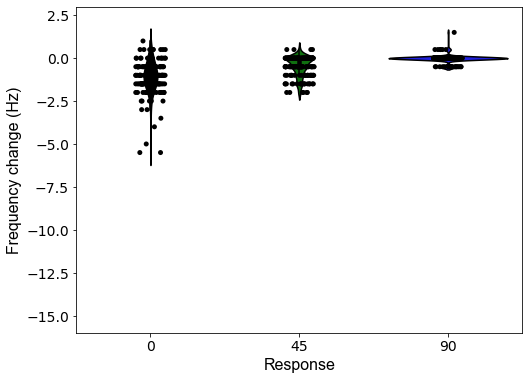

In [18]:
csfont = {"fontname": "Arial", 'fontsize': 16}
colors = {0: "black",
         45: "green" ,
         90: "blue"}
plt.figure(figsize=(8, 6))
sns.violinplot(x="distance", y="response", data=df,palette=colors)
sns.stripplot(x="distance", y="response", data=df,
              color="black", edgecolor="gray")

plt.ylabel("Frequency change (Hz)", **csfont)
plt.xlabel("Response", **csfont)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylim((-16,3))
plt.savefig(os.path.join("violin_frequency","distance_inhibition_dSPN.svg"))

In [19]:
frequency_analysis_dict = {i : dict() for i in [*e.experiments.keys()]}

In [20]:
for v, k in frequency_analysis_dict_ispn.items():
    frequency_analysis_dict[v].update(k)

In [21]:
import pandas as pd
import seaborn as sns
d = {"distance": list(), "response": list()}
tmps = dict()
for distance in [0,45,90]:
    tmps.update({distance: list()})
    for ids in frequency_analysis_dict[f"{distance}_p1"]:
        d["distance"].append(distance)
        diff = frequency_analysis_dict[f"{distance}_p1_p2"][ids] - frequency_analysis_dict[f"{distance}_p1"][ids]
        tmps[distance].append(diff)
        d["response"].append(diff)
df = pd.DataFrame(data=d)

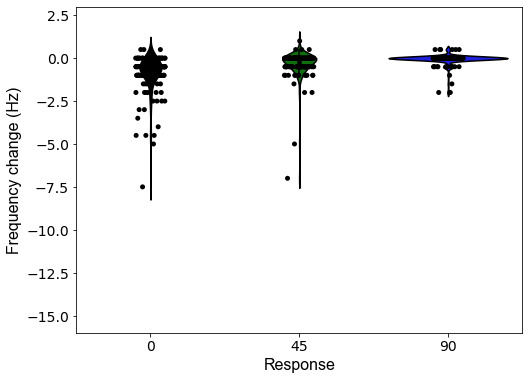

In [22]:
csfont = {"fontname": "Arial", 'fontsize': 16}
colors = {0: "black",
         45: "green" ,
         90: "blue"}
plt.figure(figsize=(8, 6))
sns.violinplot(x="distance", y="response", data=df,palette=colors)
sns.stripplot(x="distance", y="response", data=df,
              color="black", edgecolor="gray")

plt.ylabel("Frequency change (Hz)", **csfont)
plt.xlabel("Response", **csfont)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylim((-16,3))
plt.savefig(os.path.join("violin_frequency","distance_inhibition_iSPN.svg"))